In [2]:
import os
import pathlib

import numpy as np
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt

In [3]:
qec_cycles = [1, 8, 15]
qubits = ['D2', 'D3', 'Z2']

datasets = []
postsel_datasets = []

for cycle in qec_cycles:
    ds = xr.open_dataset('tomo_hist_data_cycle_' + str(cycle) + '.nc')
    datasets.append(ds)
    
for cycle in qec_cycles:
    postsel_ds = xr.open_dataset('tomo_postsel_hist_data_cycle_' + str(cycle) + '.nc')
    postsel_datasets.append(postsel_ds)

/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mfmarques/.conda/envs/dclab/lib/python3.7/site-packages/numpy/lib/histograms.py:840: Runt

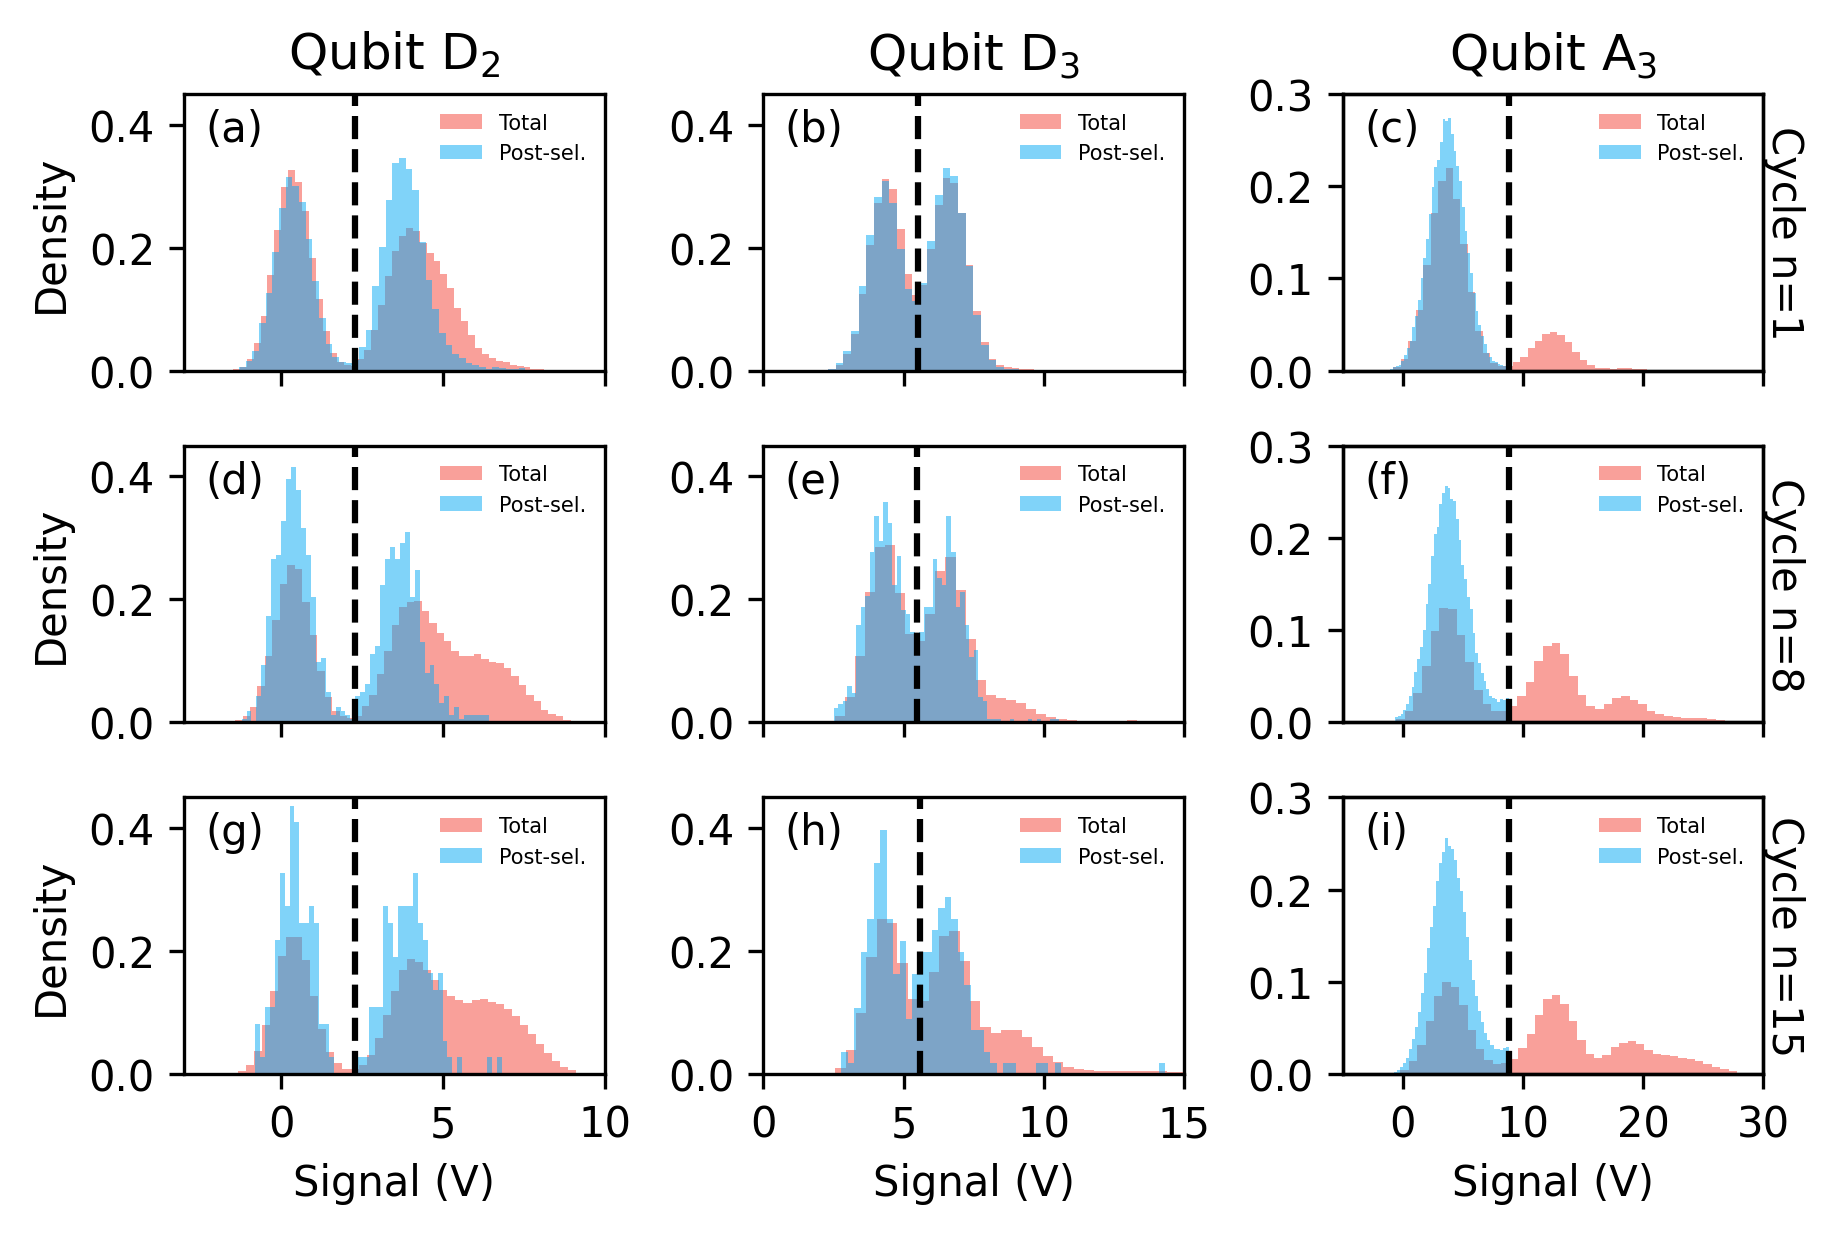

In [5]:
fig, axs  = plt.subplots(3, 3, sharex='col', sharey=False, squeeze=True, constrained_layout=True, dpi=300)

for i, cycle in enumerate(qec_cycles):
    for j, qubit in enumerate(qubits):
        axs[i, j].hist(datasets[i].hist_data.sel(qubit=qubit).data, 50, alpha=0.5, color='#f44336', density=True, label='Total')
        axs[i, j].axvline(datasets[i]._thresholds.sel(qubit=qubit).data, color='black', linestyle='--')
        
for i, cycle in enumerate(qec_cycles):
    for j, qubit in enumerate(['D2', 'D3']):
        axs[i, j].hist(postsel_datasets[i].hist_data.sel(qubit=qubit).data, 50, alpha=0.5, color='#03a9f4', density=True, label='Post-sel.')

for i, cycle in enumerate(qec_cycles):
    axs[i, 2].hist(datasets[i].hist_data.sel(qubit='Z2').where(datasets[i].hist_data.sel(qubit='Z2') <= datasets[i]._thresholds.sel(qubit='Z2')), 50, alpha=0.5, color='#03a9f4', density=True, label='Post-sel.')
for i in range(3):
    axs[i, 0].set_ylabel('Density')
    axs[-1, i].set_xlabel('Signal (V)')
    

for i in range(3):
    axs[i, 0].set_xticks([0, 5, 10])
    axs[i, 0].set_xlim(-3, 10)
    axs[i, 1].set_xticks([0, 5, 10, 15])
    axs[i, 1].set_xlim(0, 15)
    axs[i, 2].set_xticks([0, 10, 20, 30])
    axs[i, 2].set_xlim(-5, 30)
    
    
for i in range(3):
    axs[i, 0].set_yticks([0, 0.2, 0.4])
    axs[i, 0].set_ylim(0, 0.45)
    axs[i, 1].set_yticks([0, 0.2, 0.4])
    axs[i, 1].set_ylim(0, 0.45)
    axs[i, 2].set_yticks([0, 0.1, 0.2])
    axs[i, 2].set_ylim(0, 0.225)

for i, q in enumerate(qubits):
    if q == 'Z2':
        q_label = '$\mathrm{A_3}$'
        for j in range(3):
            axs[j, i].set_ylim(0,.3)
            axs[j, i].set_yticks([0,.1,.2,.3])
        
    else:
        q_label = '$\mathrm{'+q[0]+'_'+q[1]+'}$'
    axs[0, i].set_title('Qubit ' + q_label)
    

axs02twin = axs[0, 2].twinx()
axs02twin.set_ylabel('Cycle n=1', rotation=-90, labelpad=10)
axs02twin.set_yticks([])

axs12twin = axs[1, 2].twinx()
axs12twin.set_ylabel('Cycle n=8', rotation=-90, labelpad=10)
axs12twin.set_yticks([])

axs22twin = axs[2, 2].twinx()
axs22twin.set_ylabel('Cycle n=15', rotation=-90, labelpad=10)
axs22twin.set_yticks([])
    
_labels = [['(a)', '(b)', '(c)'], ['(d)', '(e)', '(f)'], ['(g)', '(h)', '(i)']]
for i in range(3):
    for j in range(3):
        axs[i][j].text(.05, .95, r'%s' % _labels[i][j], transform=axs[i][j].transAxes, ha='left', va='top')
        axs[i, j].legend(frameon=False, 
                         loc='upper right', fontsize=5)
    
plt.show()